# Ensembling
----

Why are we learning about ensembling?

- Very popular method for improving the predictive performance of machine learning models

- Provides a foundation for understanding more sophisticated models

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import metrics


from sklearn.ensemble import BaggingRegressor,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

### Classification Ensemble

In [11]:
df = pd.DataFrame(np.random.randint(0, 2, 1000).reshape(100, 10),
               columns=['Tree_' + str(i) for i in range(10)])

In [12]:
df.head(2)

,Tree_0,Tree_1,Tree_2,Tree_3,Tree_4,Tree_5,Tree_6,Tree_7,Tree_8,Tree_9
0,0,1,0,0,1,0,0,0,1,1
1,1,0,0,0,1,0,1,1,1,1


In [13]:
## this is basically calc. prediction for a EL_class model using mode values from all models
## we have 10 trees, so sum of 5 or more gives us y=1 as majority

df['finalPrediction'] = (df.apply(lambda x: x.mean(), axis=1) >= 0.5).astype(int)

In [22]:
df.head(2)

,Tree_0,Tree_1,Tree_2,Tree_3,Tree_4,Tree_5,Tree_6,Tree_7,Tree_8,Tree_9,finalPrediction
0,0,1,0,0,0,1,1,1,1,1,1
1,0,0,0,1,1,1,1,1,1,0,1


### Regressor Ensemble 

In [15]:
df_reg = pd.DataFrame(np.random.random(1000).reshape(100, 10),
                   columns=['Tree_' + str(i) for i in range(10)])

In [16]:
## Final prediction in EL_regression is basically avg values from each model

df_reg['finalPrediction'] = df.apply(lambda x: x.mean(), axis=1)

In [17]:
df_reg.head()

,Tree_0,Tree_1,Tree_2,Tree_3,Tree_4,Tree_5,Tree_6,Tree_7,Tree_8,Tree_9,finalPrediction
0,0.868424,0.181106,0.751125,0.541666,0.330907,0.683192,0.612242,0.774400,0.157460,0.050856,0.363636
1,0.122383,0.892020,0.704654,0.815930,0.365771,0.640840,0.586881,0.146182,0.530309,0.536485,0.636364
2,0.407661,0.066575,0.386774,0.387357,0.880494,0.383453,0.527802,0.610483,0.512203,0.551900,0.636364
3,0.873313,0.332592,0.353292,0.557056,0.396558,0.528107,0.076232,0.929788,0.322065,0.644028,0.727273
4,0.145528,0.050270,0.471601,0.929648,0.665166,0.353199,0.802261,0.597991,0.443520,0.259082,0.363636


## Lesson objectives

Students will be able to:

- Define ensembling and its requirements
- Identify the two basic methods of ensembling
- Decide whether manual ensembling is a useful approach for a given problem
- Explain bagging and how it can be applied to decision trees
- Explain how out-of-bag error and feature importances are calculated from bagged trees
- Explain the difference between bagged trees and Random Forests
- Build and tune a Random Forest model in scikit-learn
- Decide whether a decision tree or a Random Forest is a better model for a given problem

# Part 1: Introduction

Let's pretend that instead of building a single model to solve a binary classification problem, you created **five independent models**, and each model was correct about 70% of the time. If you combined these models into an "ensemble" and used their majority vote as a prediction, how often would the ensemble be correct?

In [18]:
import numpy as np

# set a seed for reproducibility
np.random.seed(1234)

# generate 1000 random numbers (between 0 and 1) for each model, representing 1000 observations
mod1 = np.random.rand(1000)
mod2 = np.random.rand(1000)
mod3 = np.random.rand(1000)
mod4 = np.random.rand(1000)
mod5 = np.random.rand(1000)

# each model independently predicts 1 (the "correct response") if random number was at least 0.3
preds1 = np.where(mod1 > 0.3, 1, 0)
preds2 = np.where(mod2 > 0.3, 1, 0)
preds3 = np.where(mod3 > 0.3, 1, 0)
preds4 = np.where(mod4 > 0.3, 1, 0)
preds5 = np.where(mod5 > 0.3, 1, 0)

# print the first 20 predictions from each model
print(preds1[:20])
print(preds2[:20])
print(preds3[:20])
print(preds4[:20])
print(preds5[:20])

[0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0]
[1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1]
[1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0]
[0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1]


In [28]:
# np.round(x) returns 1 if x>0.5 else returns 0

# This is mode imputation

np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0)

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1.

In [29]:
# here we are calc for each obs the mode values
# np.round(x) returns 1 if x>0.5 else returns 0
# int converts 1.0 to 1

ensemble_preds = np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0).astype(int)

# print the ensemble's first 20 predictions
print(ensemble_preds[:20])

[1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


In [29]:
# how accurate was each individual model?
print(preds1.mean())
print(preds2.mean())
print(preds3.mean())
print(preds4.mean())
print(preds5.mean())

0.713
0.665
0.717
0.712
0.687


In [30]:
# how accurate was the ensemble?

## here we see that the avg value(this is avg of a classifier dependent var) calc from an ensemble of 5 DT.
## for all 5 DT the avg value was arounf 0.7 but for ensemble its 0.8+
## this is because EL model is built using mode value from 5 models.


## now for each model we have 70% values as 1 so what that means is that when we are calc mode value for 
# those 5 values we tend to get a lot of ones which constitutes the final value for the ensemble model.

# and thats why we see higher value for the ensemble model

print(ensemble_preds.mean())

0.841


**Note:** As you add more models to the voting process, the probability of error decreases, which is known as [Condorcet's Jury Theorem](http://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem).

## What is ensembling?

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

There are two basic **methods for ensembling:**

- Manually ensemble your individual models
- Use a model that ensembles for you

# Part 2: Manual ensembling

What makes a good manual ensemble?

- Different types of **models**
    - Ex. Build an SVC, Decision Tree and a kNN
- Different combinations of **features**
    - Ex. Take a random selection of 5 variables for each model
- Different **tuning parameters**
    - Ex. From the grid search take the top 5 or ten best performing models 

![Machine learning flowchart](images/crowdflower_ensembling.jpg)

*Machine learning flowchart created by the [winner](https://github.com/ChenglongChen/Kaggle_CrowdFlower) of Kaggle's [CrowdFlower competition](https://www.kaggle.com/c/crowdflower-search-relevance)*

## Comparing manual ensembling with a single model approach

**Advantages of manual ensembling:**

- Increases predictive accuracy
- Easy to get started

**Disadvantages of manual ensembling:**

- Decreases interpretability
- Takes longer to train
- Takes longer to predict
- More complex to automate and maintain
- Small gains in accuracy may not be worth the added complexity

<big>

---

- Decision Trees are a 
    - LOW BIAS (not prone to underfitting), 
    - HIGH VARIANCE (prone to overfitting) algorithm


- ENSEMBLES are a variance reduction technique

- ENSEMBLES OF DECISION TREES create LOW BIAS, LOW VARIANCE model.

---

# Part 3: Bagging

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially due to **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general purpose procedure for reducing the variance of a machine learning method, but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

What is a **bootstrap sample**? A random sample with replacement:

In [84]:
print(np.random.choice(a=20, size=20, replace=True))

[14 18  4  9 17  0 13  9  9  7  1  0 17  8 13 19 15 10  8  7]


In [85]:
# set a seed for reproducibility
np.random.seed(1)

# create an array of 1 through 20
nums = np.arange(1, 21)
#print(nums)

# sample that array 20 times with replacement

# here size is the no. of values in the array 
# and a gives the values that those 20 nums can contain, here the 20 values can contain only values bw 1-20

# why we are getting 2 arrays is unexplainable
print(np.random.choice(a=nums, size=20, replace=True))

[ 6 12 13  9 10 12  6 16  1 17  2 13  8 14  7 19  6 19 12 11]


**How does bagging work (for decision trees)?**

1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.

#### Important
3. Combine the predictions:
    - Average the predictions for **regression trees**
    - Take a vote for **classification trees**

Notes:

- **Each bootstrap sample** should be the same size as the original training set.
- **B** should be a large enough value that the error seems to have "stabilized".
- The trees are **grown deep** so that they have low bias/high variance.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

## Manually implementing bagged decision trees (with B=10)



##### Here we have tried creating our bagging regressor ny looping 10 DT(Random) of size = 14(same as total_data, since this is bagging not RF)

In [75]:
# vehicle data
train = pd.read_csv('/home/rohan/Documents/ROHAN_DA/ALABS/___STATS___ -  cls 10 onwards/class 17_DT_Ensemble/Decision Tree and Ensemble Learning files/vehicles_train.csv')

In [77]:
# this is our training set
train['vtype'] = train.type.map({'car':0, 'truck':1})


train.drop(columns= 'type',inplace=True)

print(len(train)) # only 14 rows exists
train.head(2) 

14


,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0


In [78]:
# set a seed for reproducibility
np.random.seed(123)

# create 10 bootstrap samples (will be used to select rows from the DataFrame)

# here a is the max value that the random algo can provide
samples = [np.random.choice(a=14, size=14, replace=True) for _ in range(1, 11)]
samples

[array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1]),
 array([ 9,  0,  0,  9,  3, 13,  4,  0,  0,  4,  1,  7,  3,  2]),
 array([ 4,  7,  2,  4,  8, 13,  0,  7,  9,  3, 12, 12,  4,  6]),
 array([ 1,  5,  6, 11,  2,  1, 12,  8,  3, 10,  5,  0, 11,  2]),
 array([10, 10,  6, 13,  2,  4, 11, 11, 13, 12,  4,  6, 13,  3]),
 array([10,  0,  6,  4,  7, 11,  6,  7,  1, 11, 10,  5,  7,  9]),
 array([ 2,  4,  8,  1, 12,  2,  1,  1,  3, 12,  5,  9,  0,  8]),
 array([11,  1,  6,  3,  3, 11,  5,  9,  7,  9,  2,  3, 11,  3]),
 array([ 3,  8,  6,  9,  7,  6,  3,  9,  6, 12,  6, 11,  6,  1]),
 array([13, 10,  3,  4,  3,  1, 13,  0,  5,  8, 13,  6, 11,  8])]

In [79]:
# read in and prepare the vehicle testing data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_test.csv'
test = pd.read_csv(url)


# this is our testing set
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [81]:
# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# list for storing predicted price from each tree
predictions = []

# define testing data
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    
    ## we are looping var in sample here, sample contains 10 arrays each of which contains 14 values.
    ## so that means we are selecting 14 random values(values getting repeated as well) from total of
    ## 14 unique values we have in our train dataset
    
    ## and we are building 10 differenct DT models by that(looping)
    
    # we are simply taking n values(repeat) from training dataset based on samples(10 combinations)
    #for building each tree.
    X_train = train.iloc[sample, 1:] # Train is the main dataset, we are excluding 1 column (dependent)
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions

array([[ 1300.,  5000., 14000.],
       [ 1300.,  1300., 13000.],
       [ 3000.,  3000., 13000.],
       [ 4000.,  5000., 13000.],
       [ 1300.,  5000., 13000.],
       [ 4000.,  5000., 14000.],
       [ 4000.,  4000., 13000.],
       [ 4000.,  5000., 13000.],
       [ 3000.,  5000.,  9500.],
       [ 4000.,  5000.,  9000.]])

In [82]:
# average predictions
np.mean(predictions, axis=0)

array([ 2990.,  4330., 12450.])

In [9]:
# calculate RMSE

y_pred = np.mean(predictions, axis=0)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

998.5823284370031

## Bagged decision trees in scikit-learn (with B=500)

#### Here unlike above we have used a bagging regressor which loops 500 DT for us randomly.

In [86]:
# define the training and testing sets
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [208]:
# instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator"

## max sample and max features are both =1 which means we are selecting all features unlike RF
## Here we have also changed the arguments passed into the DT regressor(base estimater), we can also think of 
## passing in a DT_regressor after doing gridsearch CV.

bagreg = BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',min_samples_split= 2),
                          n_estimators=500,bootstrap_features = False,n_jobs = -1,
                          bootstrap=True, 
                          oob_score=True, 
                          random_state=1)

### Bagging regressor

In [216]:
gscv_bag_reg = GridSearchCV(estimator=bagreg,param_grid= pargrid_bag,cv =5,n_jobs=-1)
                          #  ,scoring='neg_mean_squared_error')

In [217]:
gscv_bag_reg.fit(X_train,y_train)

/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
       ..., n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [205]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [211]:
gscv_bag_reg.scorer_

make_scorer(mean_squared_error, greater_is_better=False)

In [212]:
gscv_bag_reg.best_estimator_

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=600, n_jobs=-1, oob_score=True,
         random_state=1, verbose=0, warm_start=False)

In [218]:
gscv_bag_reg.best_score_

-5.771032198693625

In [219]:
gscv_bag_reg.cv_results_

/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rohan/anaconda3/lib/python3.

{'mean_fit_time': array([0.18881755, 0.24451847, 0.47798305, 0.73957753, 0.98784442]),
 'std_fit_time': array([0.05407781, 0.00932585, 0.0114305 , 0.04488148, 0.06438777]),
 'mean_score_time': array([0.1053328 , 0.10679193, 0.10402079, 0.12655339, 0.10501771]),
 'std_score_time': array([0.00292315, 0.00424584, 0.00176002, 0.04532788, 0.0029525 ]),
 'param_n_estimators': masked_array(data=[100, 200, 400, 600, 800],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 400},
  {'n_estimators': 600},
  {'n_estimators': 800}],
 'split0_test_score': array([-3.96697825, -3.78717736, -3.67382922, -3.67032203, -3.65480879]),
 'split1_test_score': array([0.2953587 , 0.22152949, 0.22885436, 0.3034768 , 0.24771422]),
 'split2_test_score': array([-0.0053975 , -0.17549787,  0.01887822, -0.04882767, -0.03839202]),
 'split3_test_score': array([0.63580592, 0.62657149, 0.

### -------------------

In [106]:
# fit and predict
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([ 3344.2,  5395. , 12902. ])

In [107]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

657.8000304043775

#### OOB score is calculated when we have less datapoints & we desire to use all datapoints & leave nothing for testing, In that case OOB score helps`


#### Bagreg .score  - Returns the coefficient of determination R^2 of the prediction.

In [96]:
# compute the out-of-bag R-squared score (not MSE, unfortunately!) for B=500
bagreg.oob_score_

0.7986955133989982

In [97]:
bagreg.score(X_train, y_train)

0.9726141735007006

In [98]:
bagreg.score(X_test, y_test)

0.9690927942857143

## Bagging done manually & OOB score explained

In [108]:
df_titanic = pd.read_csv('/home/rohan/Documents/ROHAN_DA/UDEMY/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [109]:
df_titanic.shape

(891, 12)

In [110]:

X_tr, X_te, y_tr, y_te = train_test_split(df_titanic[[x for x in df_titanic.columns if 'Survived' not in x]],
                                         df_titanic.loc[:, 'Survived'],
                                          train_size = 0.8)

/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [111]:
X_tr.shape

(712, 11)

In [112]:
predictions = []
for _ in range(20):
    bag = pd.concat([X_tr, y_tr], axis=1).sample(n=712, replace=True)
    X = bag.loc[:, ['Age', 'Fare']].fillna(0)
    y = bag.loc[:, 'Survived']
    
    #dt1 = DecisionTreeClassifier()
    dt = DecisionTreeClassifier()
    dt.fit(X, y)
    y_pr = dt.predict(X_te.loc[:, ['Age', 'Fare']].fillna(0))
    predictions.append(y_pr)

In [42]:
#predictions

In [113]:
pd.DataFrame(predictions).T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1


----
## Estimating out-of-sample error

For bagged models, out-of-sample error can be estimated without using **train/test split** or **cross-validation**!

On average, each bagged tree uses about **two-thirds** of the observations. For each tree, the **remaining observations** are called "out-of-bag" observations.

In [43]:
# show the first bootstrap sample
samples[0]

array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1])

In [44]:
# show the "in-bag" observations for each sample
for sample in samples:
    print(set(sample))

{0, 1, 2, 3, 6, 9, 10, 11, 12, 13}
{0, 1, 2, 3, 4, 7, 9, 13}
{0, 2, 3, 4, 6, 7, 8, 9, 12, 13}
{0, 1, 2, 3, 5, 6, 8, 10, 11, 12}
{2, 3, 4, 6, 10, 11, 12, 13}
{0, 1, 4, 5, 6, 7, 9, 10, 11}
{0, 1, 2, 3, 4, 5, 8, 9, 12}
{1, 2, 3, 5, 6, 7, 9, 11}
{1, 3, 6, 7, 8, 9, 11, 12}
{0, 1, 3, 4, 5, 6, 8, 10, 11, 13}


In [54]:
# show the "out-of-bag" observations for each sample
for sample in samples:
    print(sorted(set(range(14)) - set(sample)))

[4, 5, 7, 8]
[5, 6, 8, 10, 11, 12]
[1, 5, 10, 11]
[4, 7, 9, 13]
[0, 1, 5, 7, 8, 9]
[2, 3, 8, 12, 13]
[6, 7, 10, 11, 13]
[0, 4, 8, 10, 12, 13]
[0, 2, 4, 5, 10, 13]
[2, 7, 9, 12]


How to calculate **"out-of-bag error":**

1. For every observation in the training data, predict its response value using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When B is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

In [45]:
# compute the out-of-bag R-squared score (not MSE, unfortunately!) for B=500
bagreg.oob_score_

0.7986955133989982

---
# Model $Ensembles$


> Ensemble methods combine multiple classifiers (using _model averaging_ or _voting_) which may differ in algorithms, input features, or input samples. Statistical analyses showed that ensemble methods yield better classification performances and are also less prone to overfitting. Different methods, e.g., bagging or boosting, are used to construct the final classification decision based on weighted votes.

## What is ensembling?

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

There are two basic **methods for ensembling:**

- Manually ensemble your individual models
- Use a model that ensembles for you

---
Why are we learning about ensembling?

- Very popular method for improving the predictive performance of machine learning models

- Provides a foundation for understanding more sophisticated models

---
# Manual ensembling

What makes a good manual ensemble?

- Different types of **models**
    - Ex. Build an SVC, Decision Tree and a kNN
- Different combinations of **features**
    - Ex. Take a random selection of 5 variables for each model
- Different **tuning parameters**
    - Ex. From the grid search take the top 5 or ten best performing models 

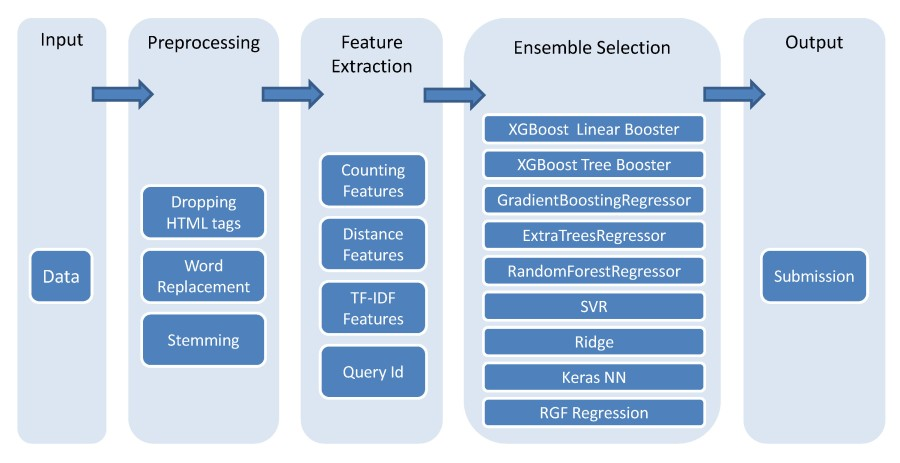

In [17]:
from IPython.display import Image
Image(filename='/home/rohan/Documents/ROHAN_DA/ALABS/___STATS___ -  cls 10 onwards/class 17_Decision_Tree/Decision Tree and Ensemble Learning files/HR Analytics Case Study - Class/crowdflower_ensembling.jpg')

## Comparing manual ensembling with a single model approach

**Advantages of manual ensembling:**

- Increases predictive accuracya
- Easy to get started

**Disadvantages of manual ensembling:**

- Decreases interpretability
- Takes longer to train
- Takes longer to predict
- More complex to automate and maintain
- Small gains in accuracy may not be worth the added complexity

<big>

---

- Decision Trees are a 
    - LOW BIAS (not prone to underfitting), 
    - HIGH VARIANCE (prone to overfitting) algorithm


- ENSEMBLES are a variance reduction technique

- ENSEMBLES OF DECISION TREES create LOW BIAS, LOW VARIANCE model.

---

# Bagging

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially due to **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general purpose procedure for reducing the variance of a machine learning method, but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

What is a **bootstrap sample**? A random sample with replacement:

---
**How does bagging work (for decision trees)?**

1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
    - Average the predictions for **regression trees**
    - Take a vote for **classification trees**

Notes:

- **Each bootstrap sample** should be the same size as the original training set.
- **B** should be a large enough value that the error seems to have "stabilized".
- The trees are **grown deep** so that they have low bias/high variance.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

### Bagged decision trees (with B=10)

In [114]:
hr_df = pd.read_csv('/home/rohan/Documents/ROHAN_DA/ALABS/___STATS___ -  cls 10 onwards/class 17_DT_Ensemble/Decision Tree and Ensemble Learning files/HR Analytics Case Study - Class/HR_comma_sep.csv')

In [115]:
hr_df = pd.get_dummies(data= hr_df,columns=hr_df.select_dtypes('object').columns,drop_first=True)

In [116]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [117]:
X_col = hr_df.columns.difference(['left'])
Y_col = hr_df.left

In [118]:
train_X, test_X, train_y, test_y = train_test_split(hr_df[X_col],hr_df.left,test_size = .25,random_state = 42)

In [119]:
pargrid_bag = {'n_estimators': [100, 200, 400, 600, 800]}

In [127]:
gscv_Bag = GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),oob_score=True),
                        param_grid=pargrid_bag,scoring = 'recall',
                        cv=5,verbose=True, n_jobs=-1)

In [128]:
gscv_Bag.fit(train_X, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...estimators=10, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=True)

### Attributes of Built(not predicted) Bagging Regressor

In [129]:
gscv_Bag.score(train_X, train_y) # same as metrics.score(train_X, train_y)

1.0

In [130]:
gscv_Bag.best_estimator_.oob_decision_function_ #  here we are clac scores for all values of y's
                                                # and later somehow calc an aggreg score out of these.

array([[0.22580645, 0.77419355],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [1.        , 0.        ]])

In [131]:
gscv_Bag.best_estimator_.oob_score_

0.9896879722642012

In [132]:
gscv_Bag.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [133]:
gscv_Bag.best_params_

{'n_estimators': 100}

- when we are fitting the bagging regressor in the model it is calc.  error(accuracy) for each cv done 
- for each model and finally taking the mean of all cv error(accuracy) scores, which is basically the
- the score of the model. 

- and when we are calc calc the accuracy score using metrics then it is not taking into account the no. of 
- cv's done(and the clubbed score), so that's why both these scores would be different.

In [134]:
gscv_Bag.best_score_

0.965969745885152

In [135]:
gscv_Bag.scorer_

make_scorer(recall_score)

In [75]:
gscv_Bag.error_score

'raise'

In [87]:
gscv_Bag.grid_scores_

/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.98889, std: 0.00197, params: {'n_estimators': 100},
 mean: 0.98862, std: 0.00177, params: {'n_estimators': 200},
 mean: 0.98853, std: 0.00181, params: {'n_estimators': 400},
 mean: 0.98844, std: 0.00193, params: {'n_estimators': 600},
 mean: 0.98880, std: 0.00157, params: {'n_estimators': 800}]

In [29]:
## this gives each cv score and also the mean score for each model(which basically) is the mean of 5 cv's 
## for that model
gscv_Bag.cv_results_

/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rohan/anaconda3/lib/python3.

{'mean_fit_time': array([ 3.2505127 ,  6.18562903, 12.86989226, 18.35625558, 21.15564628]),
 'std_fit_time': array([0.09387772, 0.72758744, 0.99385585, 0.56058003, 2.65957079]),
 'mean_score_time': array([0.07483191, 0.12722139, 0.221451  , 0.33790693, 0.4060349 ]),
 'std_score_time': array([0.01241497, 0.01238182, 0.00467585, 0.01653655, 0.1044001 ]),
 'param_n_estimators': masked_array(data=[100, 200, 400, 600, 800],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 400},
  {'n_estimators': 600},
  {'n_estimators': 800}],
 'split0_test_score': array([0.988     , 0.98844444, 0.98888889, 0.988     , 0.988     ]),
 'split1_test_score': array([0.98933333, 0.98933333, 0.98933333, 0.98933333, 0.98933333]),
 'split2_test_score': array([0.98488889, 0.98533333, 0.98577778, 0.98577778, 0.98533333]),
 'split3_test_score': array([0.98933333, 0.98977778, 0.98977

###### -------------------------------Predicting -------------------------------------

In [140]:
y_pred_train = pd.DataFrame( { 'actual': train_y,
                            'predicted': gscv_Bag.best_estimator_.predict(train_X) } )

In [ ]:
#y_pred_train

In [141]:
y_pred_test = pd.DataFrame( { 'actual': test_y,
                            'predicted': gscv_Bag.best_estimator_.predict( test_X) } )

In [142]:
y_pred_test.head()

,actual,predicted
6723,0,0
6473,0,0
4679,0,0
862,1,1
7286,0,0


### Calc Metrics

In [143]:
## this is the same as gscv.score(xtrain,ytrain)
metrics.accuracy_score(y_pred_train.actual,y_pred_train.predicted.astype('int'))

1.0

In [144]:
metrics.accuracy_score(y_pred_test.actual,y_pred_test.predicted.astype('int'))

0.9864

In [145]:
metrics.roc_auc_score(y_pred_test.actual,y_pred_test.predicted.astype('int'))

0.9795972554853368

Text(0.5,15,'Predicted label')

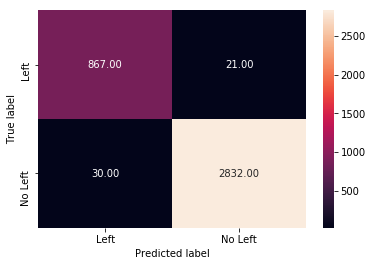

In [146]:
tree_bg = metrics.confusion_matrix( y_pred_test.predicted.astype('int'),
                                 y_pred_test.actual,
                                 [1,0] )
sns.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Boosting

#### Ada Boosting

In [150]:
pargrid_ada = {'n_estimators': [ 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-1, 1)]}

In [41]:
## we dont have oob score for adaboost
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(),scoring='recall',
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [42]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [400, 600, 800], 'learning_rate': [0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=True)

In [44]:
gscv_ada.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=800, random_state=None)

In [45]:
gscv_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [46]:
gscv_ada.best_score_

0.9106195806357293

In [60]:
gscv_ada.grid_scores_

/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.89865, std: 0.00654, params: {'learning_rate': 0.1, 'n_estimators': 400},
 mean: 0.90800, std: 0.00782, params: {'learning_rate': 0.1, 'n_estimators': 600},
 mean: 0.91062, std: 0.00705, params: {'learning_rate': 0.1, 'n_estimators': 800},
 mean: 0.90800, std: 0.00413, params: {'learning_rate': 1, 'n_estimators': 400},
 mean: 0.90800, std: 0.00397, params: {'learning_rate': 1, 'n_estimators': 600},
 mean: 0.90613, std: 0.00360, params: {'learning_rate': 1, 'n_estimators': 800}]

In [48]:
gscv_ada.param_grid

{'n_estimators': [400, 600, 800], 'learning_rate': [0.1, 1]}

In [58]:
## this basically is scoring method used while calc the scores for cv.
## works similar to scoring in cross_val_score
gscv_ada.scorer_

make_scorer(recall_score)

In [51]:
clf_ada = gscv_ada.best_estimator_

In [59]:
gscv_ada.cv_results_

/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/rohan/anaconda3/lib/python3.

{'mean_fit_time': array([3.18945985, 4.9386519 , 6.72853117, 3.35585093, 4.8346941 ,
        6.18439565]),
 'std_fit_time': array([0.08779503, 0.0553698 , 0.32991153, 0.1104048 , 0.08485013,
        0.60678641]),
 'mean_score_time': array([0.2394608 , 0.36345668, 0.52245584, 0.25169187, 0.3706533 ,
        0.44793377]),
 'std_score_time': array([0.00757896, 0.00639764, 0.02874006, 0.01634083, 0.00799868,
        0.12504803]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[400, 600, 800, 400, 600, 800],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1, 'n_estimators': 400},
  {'learning_rate': 0.1, 'n_estimators': 600},
  {'learning_rate': 0.1, 'n_estimators': 800},
  {'learning_rate': 1, 'n_estimators': 400},
  {

In [57]:
print(pd.Series(cross_val_score(clf_ada,train_X, train_y, cv=10)).describe()[['min', 'mean', 'max']])

print(pd.Series(cross_val_score(clf_ada,test_X, test_y, cv=10)).describe()[['min', 'mean', 'max']])

min     0.952847
mean    0.961596
max     0.967972
dtype: float64
min     0.944000
mean    0.962670
max     0.981333
dtype: float64


In [62]:
clf_ada.feature_importances_

array([0.02625, 0.1675 , 0.0125 , 0.     , 0.0125 , 0.00375, 0.     ,
       0.01   , 0.00625, 0.     , 0.01375, 0.1375 , 0.1125 , 0.005  ,
       0.0425 , 0.01875, 0.3175 , 0.11375])